In [1]:
import numpy as np
import pandas as pd
import random

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#### Create sample of size $d=3$

In [2]:
random.seed(24)
n=1000
df = pd.DataFrame(np.random.uniform(0,1,size=(n, 3)))

In [3]:
df_copy = pd.DataFrame(np.random.uniform(0,1,size=(n, 2)))

df_copy =pd.concat([df[0],df_copy],axis=1,ignore_index=True)

max(df_copy[2]-df[2]) <10e-6

False

### Ishigami function 

Simulate values of $Y$ through relationship 

\begin{equation}
    Y = \sin(X_{1})+ a \sin^{2}(X_{2}) + b X_{3}^{4} \sin(X_{1}) + \varepsilon
\end{equation}

We will keep the dimension fixed

In [4]:
class dataset:
    def __init__(self,n,p,df):
        #Number of observations
        self.n = n
        #MCAR Bernoulli prob.
        self.p = p
        #data set 
        self.df = df 
        
    #Ishigami function
    
    
        np.random.seed(24)   
    
    def ishigami(self):
        return lambda a, b: np.sin(self.df[0]) + a * np.sin(self.df[1])**2 + b * (self.df[2])**4 * np.sin(self.df[0])+ np.random.normal(0, 1, self.n)
    
    #H-Sample with target from Ishigami function
    
    def h_df(self,a,b):
        self.df['Y'] = self.ishigami()(a,b)
        return self.df
    
    #Ishigami plots 
    
    def ishigami_scatter(self,x3,a,b):
        z = np.sin(self.df[0]) + a * np.sin(self.df[1])**2 + b * (x3)**4 * np.sin(df[0]) + np.random.normal(0, 1, n)
        x = self.df[0]
        y = self.df[1]
        
        x1 = self.sample(a,b)[0]
        x2 = self.sample(a,b)[2]
        
    
        fig = plt.figure(figsize = (10,10))
        ax = plt.axes(projection='3d')
        ax.grid()
    
        ax.scatter(x, y, z, c = 'r', s = 50)
        #ax.set_title('Ishigami function scatter plot for $X_{3}=$'+str(x3)+', a='+str(a)+' and b='+str(b))
    
        ax.set_xlabel('$X_{1}$', labelpad=20,fontsize=15)
        ax.set_ylabel('$X_{2}$', labelpad=20,fontsize=15)
        ax.set_zlabel('Y', labelpad=20,fontsize=15)
    
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='z', labelsize=15)
    
        ax.grid(False)
        plt.savefig('Ishigami for X3='+str(x3)+', a='+str(a)+' and b='+str(b)+'.pdf', transparent=True,bbox_inches='tight')
        return 
    
    
    
   
    
    
    #MCAR missing data mechanism
    def mcar(self):
        return pd.DataFrame(np.random.binomial(size=(self.n,3), n=1, p= self.p))
    
    #Callable function that depends on missingness mechanism
    def data_missing(self):
        return lambda x: self.df[x == 1]
    
    def sample(self, a, b):
        return self.data_missing()(self.mcar()).assign(Y = self.ishigami()(a, b))
    
    #Complete case analysis
    def cc(self,a,b):
        return self.sample(a,b).dropna()
    
        
    
 

In [5]:
test = dataset(n,0.75,df)
sample = test.h_df(1,1)
cc = test.cc(1,1)
Y = sample['Y']

In [6]:
len(cc)

419

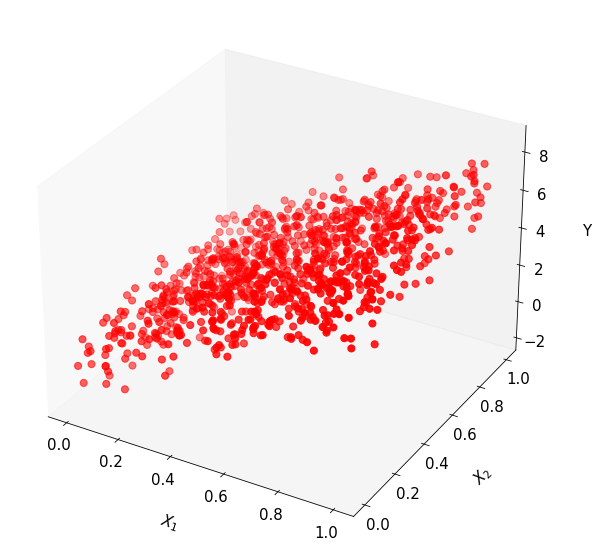

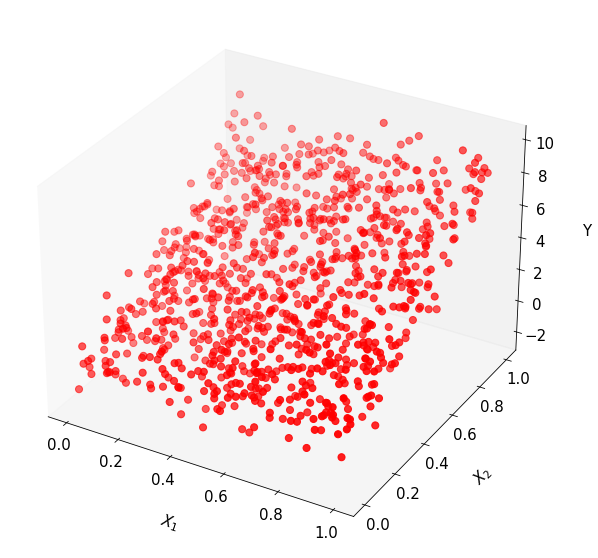

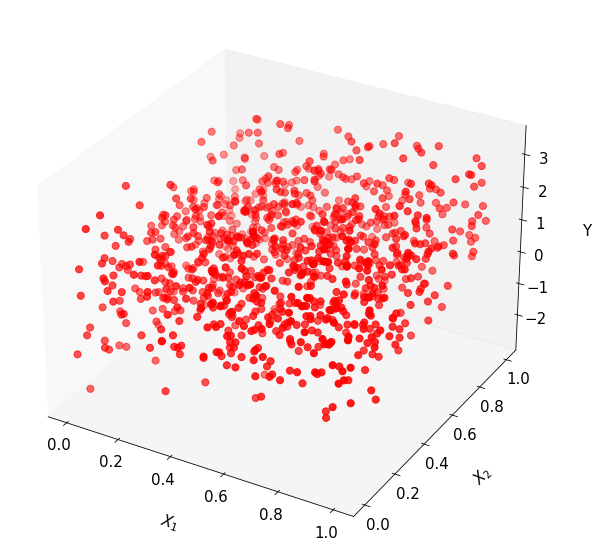

In [7]:
test.ishigami_scatter(x3=0.9,a=0.2,b=10)
test.ishigami_scatter(x3=0.6,a=10,b=0.2)
test.ishigami_scatter(x3=0.5,a=1,b=1)

In [8]:
np.cov(Y,Y_pick)

NameError: name 'Y_pick' is not defined

In [ ]:
def ishigami_3d(x3,a,b,n1):
    X, Y = np.meshgrid(df[0][:n1], df[1][:n1])

    Z = np.sin(X) + a * np.sin(Y)**2 + b * (x3)**4 * np.sin(X) 

    fig = plt.figure(figsize = (12,10))
    ax = plt.axes(projection='3d')

    surf = ax.plot_surface(X, Y, Z)
    ax.grid(False)
    
    ax.set_title('Surface plot for $X_{3}$ ='+str(x3))
    
    plt.show()

ishigami_3d(x3=0.7,a=3,b=1,n1=100)

In [ ]:
#Ishigami plots 
def ishigami_scatter(x3,a,b):
    np.random.seed(24)
    z = np.sin(df[0]) + a * np.sin(df[1])**2 + b * (x3)**4 * np.sin(df[0]) + np.random.normal(0, 1, n)
    x = df[0]
    y = df[1]
    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    ax.grid()
    
    ax.scatter(x, y, z, c = 'r', s = 50)
    #ax.set_title('Ishigami function scatter plot for $X_{3}=$'+str(x3)+', a='+str(a)+' and b='+str(b))
    
    ax.set_xlabel('$X_{1}$', labelpad=20,fontsize=15)
    ax.set_ylabel('$X_{2}$', labelpad=20,fontsize=15)
    ax.set_zlabel('Y', labelpad=20,fontsize=15)
    
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='z', labelsize=15)
    
    ax.grid(False)
    plt.savefig('Ishigami for X3='+str(x3)+', a='+str(a)+' and b='+str(b)+'.pdf', transparent=True,bbox_inches='tight')
    return 

In [ ]:
#Ishigami illustrations
ishigami_scatter(x3=0.9,a=0.2,b=10)
ishigami_scatter(x3=0.6,a=10,b=0.2)
ishigami_scatter(x3=0.5,a=1,b=1)

### Nonparametric regression with Naradaya-Watson estimator 

\begin{equation}
m_{n,nw}(\mathbf{x})=\frac{\sum_{i=1}^n Y_i K\left(\frac{\mathbf{x}-\mathbf{X}_i}{h}\right)}{\sum_{i=1}^n K\left(\frac{\mathbf{x}-\mathbf{X}_i}{h}\right)}
\end{equation}

with the Gaussian Kernel

In [ ]:
a=1
b=1
eps = np.random.seed(24)
eps = np.random.normal(0, 1, n)

#'def ishigami(self):
 #       return lambda a, b: np.sin(self.df[0]) + a * np.sin(self.df[1])**2 + b * (self.df[2])**4 * np.sin(self.df[0])+ np.random.normal(0, 1, n)'


In [ ]:
class anova_ishigami:
    def __init__(self,n,df):
        
        self.n = n
        self.df = df
        
        np.random.seed(24)
        eps =  np.random.normal(0, 1, self.n)
        
        
    def grand_mean(self):
        return np.mean(self.df['Y'])
    
    def main_effect1(self):
        return lambda x: np.sin(x) + a * np.mean(np.sin(self.df[1])**2) + b * np.sin(x)* np.mean((self.df[2])**4)+np.mean(eps)  - self.grand_mean()
    
    def main_effect2(self):
        return lambda x: np.mean(np.sin(self.df[0])) + a * np.sin(x)**2 +  b * np.mean((self.df[2])**4 * np.sin(self.df[0]))+np.mean(eps)   - self.grand_mean()
                                 
    def main_effect3(self):
        return lambda x: np.mean(np.sin(self.df[0]) + a * np.sin(self.df[1])**2) + b * (x)**4 * np.mean(np.sin(self.df[0]))+np.mean(eps)  -self.grand_mean()
        
        

In [ ]:
anova_sim = anova_ishigami(n,df)

In [ ]:
plt.plot(np.linspace(0,1,n),anova_sim.main_effect1()(np.linspace(0,1,n))**2,c='b')
plt.plot(np.linspace(0,1,n),anova_sim.main_effect2()(np.linspace(0,1,n))**2,c='r')
plt.plot(np.linspace(0,1,n),anova_sim.main_effect3()(np.linspace(0,1,n))**2,c='orange')

plt.savefig('variance_decomposition_ishigami.pdf',transparent=True)